In [1]:
# !pip install dabest --user

  Using cached dabest-2023.2.14-py2.py3-none-any.whl (96 kB)
  Using cached pandas-1.5.3-cp311-cp311-macosx_11_0_arm64.whl (10.8 MB)
  Using cached lqrt-0.3.3-py3-none-any.whl (21 kB)


In [2]:
import numpy as np
import pandas as pd
import dabest
import seaborn as sns

In [5]:
df = pd.read_csv('/Users/kab285/Downloads/metaloki/analysis/aggregated_data/blocks_to_criterion.csv')

In [6]:
rot_un_df = df.loc[df.phase != 'b'].copy().reset_index(drop=1)

In [7]:
learners_only_df = rot_un_df.loc[rot_un_df['sub'] != 927]



In [8]:
round(learners_only_df.groupby(['phase']).blocks_to_criterion.mean(),1)


phase
r     3.6
u    11.2
Name: blocks_to_criterion, dtype: float64

In [9]:
round(learners_only_df.groupby(['phase']).blocks_to_criterion.std(),1)



phase
r     2.2
u    14.9
Name: blocks_to_criterion, dtype: float64

In [10]:
rot_un_df.groupby(['phase']).blocks_to_criterion.mean()

phase
r     6.8
u    14.0
Name: blocks_to_criterion, dtype: float64

In [11]:
round(rot_un_df.groupby(['phase']).blocks_to_criterion.std(),1)


phase
r    14.3
u    19.1
Name: blocks_to_criterion, dtype: float64

In [12]:
rot_un_df.head()

,sub,level_1,blocks_to_criterion,phase
0,912,0,4,r
1,912,0,6,u
2,913,0,3,r
3,913,0,5,u
4,914,0,2,r


In [13]:
print(rot_un_df['sub'].nunique(),  'Subjects')

20 Subjects


In [14]:
rot_un_df_wide = rot_un_df.pivot(index='sub',columns='phase',values='blocks_to_criterion').reset_index()

rot_un_df_wide.rename(columns={'r': 'Rotation', 'u': 'Inversion'}, inplace=1)

In [15]:
rot_un_df_wide.head()

phase,sub,Rotation,Inversion
0,912,4,6
1,913,3,5
2,914,2,8
3,915,5,8
4,916,1,8


In [17]:
?dabest.load

In [18]:
# two_groups_paired = dabest.load(rot_un_df_wide, idx=("Rotation", "Inversion"),
#                                 paired=True, id_col="sub") # syntax change for paired stats with update

two_groups_paired = dabest.load(rot_un_df_wide, idx=("Rotation", "Inversion"),
                                paired='baseline', id_col="sub")

In [19]:
two_groups_paired.mean_diff

/Users/kab285/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


DABEST v2023.02.14
                  
Good afternoon!
The current time is Mon Sep 11 15:53:06 2023.

The paired mean difference for repeated measures against baseline 
between Rotation and Inversion is 7.2 [95%CI 3.1, 19.2].
The p-value of the two-sided permutation t-test is 0.0, calculated for legacy purposes only. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
Any p-value reported is the probability of observing theeffect size (or greater),
assuming the null hypothesis ofzero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

In [20]:
7.2 - 3.1

4.1

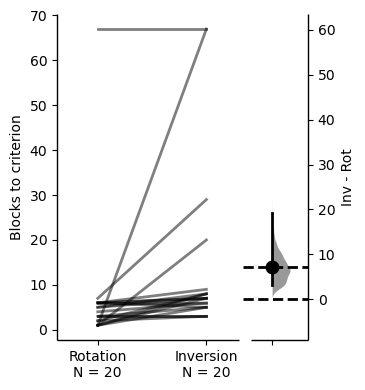

In [21]:
ax = two_groups_paired.mean_diff.plot(swarm_label='Blocks to criterion',slopegraph_kwargs={'color': 'red', 'lw': 2},
                                      reflines_kwargs={'linestyle':'dashed', 'linewidth': 2},contrast_label=r'Inv - Rot')

ax.gca().set(xticklabels=[])

ax.savefig('/Users/kab285/Downloads/metaloki/analysis/figures/effectsize_Rot_Inv.pdf', dpi=300)

# Excluding the nonlearner

In [22]:
non_learner = 927
excluding_nonlearner = (rot_un_df_wide.loc[rot_un_df_wide['sub'] != non_learner].copy()).reset_index(drop=True)

In [23]:
learners_two_groups_paired = dabest.load(excluding_nonlearner, idx=("Rotation", "Inversion"),
                                paired='baseline', id_col="sub")

In [24]:
learners_two_groups_paired.mean_diff

/Users/kab285/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


DABEST v2023.02.14
                  
Good afternoon!
The current time is Mon Sep 11 15:53:51 2023.

The paired mean difference for repeated measures against baseline 
between Rotation and Inversion is 7.58 [95%CI 3.26, 19.7].
The p-value of the two-sided permutation t-test is 0.0006, calculated for legacy purposes only. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
Any p-value reported is the probability of observing theeffect size (or greater),
assuming the null hypothesis ofzero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

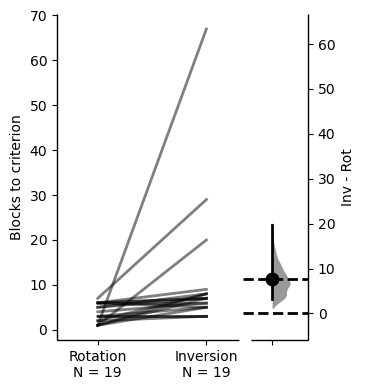

In [25]:
ax = learners_two_groups_paired.mean_diff.plot(swarm_label='Blocks to criterion',slopegraph_kwargs={'color': 'red', 'lw': 2},
                                      reflines_kwargs={'linestyle':'dashed', 'linewidth': 2},contrast_label=r'Inv - Rot')

ax.gca().set(xticklabels=[])

ax.savefig('/Users/kab285/Downloads/metaloki/analysis/figures/effectsize_Rot_Inv_exclude.pdf', dpi=300)